In [1]:
import json

import numpy as np
import pandas as pd

### Importing raw congressional Bios

In [2]:
!pwd

/Users/henryjosephson/uchicago/4.1-Autumn-2024/Data Viz/congress-project


In [4]:
from os import listdir
from os.path import isfile, join

path = "./data/BioguideProfiles/"
file_list = [f for f in listdir(path) if isfile(join(path, f))]

In [42]:
dfs = []
for file in file_list:
    data = pd.read_json(path + "/" + file, lines=True)
    dfs.append(data)

temp = pd.concat(dfs, ignore_index=True)

In [43]:
# this avoids errors when creating the congress column, because index 0 is
# out of range when you're dealing with an empty list.
temp = temp.loc[temp.apply(lambda x: len(x.jobPositions), axis=1) != 0]

# this gets rid of people whose final federal job wasn't congress, since I'm
# looking for people in the 118th congress.
temp = temp.loc[temp.apply(lambda x: "'congress':" in str(x.jobPositions[-1]), axis=1)]

In [44]:
"'congress':" in str(temp.iloc[535].jobPositions)

True

In [45]:
temp.iloc[1000].jobPositions[-1][
    "congressAffiliation"
]  # ["congress"]["congressNumber"]

{'congress': {'name': 'The 31st United States Congress',
  'congressNumber': 31,
  'congressType': 'USCongress',
  'startDate': '1849-03-05',
  'endDate': '1851-03-03'},
 'partyAffiliation': [{'party': {'name': 'Democrat'}}],
 'caucusAffiliation': [{'party': {'name': 'Democrat'}}],
 'represents': {'regionType': 'DistrictRegion', 'regionCode': 'PA'}}

In [46]:
for x in temp.iterrows():
    x[1].jobPositions[-1]["congressAffiliation"]["congress"]["congressNumber"]

In [47]:
temp.loc[:, "congress"] = temp.apply(
    lambda x: x.jobPositions[-1]["congressAffiliation"]["congress"]["congressNumber"],
    axis=1,
)

In [48]:
temp.query("congress == 118")["profileText"]

8        a Representative from Utah; born in Columbus, ...
62       A Senator and a Representative from Indiana; b...
83       a Representative from Missouri; born in Baytow...
137      A Representative from Kentucky; born in Cartha...
156      a Senator from California; born in Magnolia, M...
                               ...                        
12851    A Senator and a Representative from New York; ...
12861    A Senator and a Representative from New Mexico...
12876    A Representative from New Jersey; born in Pate...
12910    a Representative from Florida; born in Brookly...
12928    A Senator and a Representative from Massachuse...
Name: profileText, Length: 543, dtype: object

...what is that at 12395?

In [49]:
temp.query("congress == 118")["profileText"][12395]

'<!-- [if gte mso 9]><xml>\n <o:OfficeDocumentSettings>\n  <o:AllowPNG/>\n </o:OfficeDocumentSettings>\n</xml><![endif]--><!-- [if gte mso 9]><xml>\n <w:WordDocument>\n  <w:View>Normal</w:View>\n  <w:Zoom>0</w:Zoom>\n  <w:TrackMoves/>\n  <w:TrackFormatting/>\n  <w:PunctuationKerning/>\n  <w:ValidateAgainstSchemas/>\n  <w:SaveIfXMLInvalid>false</w:SaveIfXMLInvalid>\n  <w:IgnoreMixedContent>false</w:IgnoreMixedContent>\n  <w:AlwaysShowPlaceholderText>false</w:AlwaysShowPlaceholderText>\n  <w:DoNotPromoteQF/>\n  <w:LidThemeOther>EN-US</w:LidThemeOther>\n  <w:LidThemeAsian>X-NONE</w:LidThemeAsian>\n  <w:LidThemeComplexScript>X-NONE</w:LidThemeComplexScript>\n  <w:Compatibility>\n   <w:BreakWrappedTables/>\n   <w:SnapToGridInCell/>\n   <w:WrapTextWithPunct/>\n   <w:UseAsianBreakRules/>\n   <w:DontGrowAutofit/>\n   <w:SplitPgBreakAndParaMark/>\n   <w:EnableOpenTypeKerning/>\n   <w:DontFlipMirrorIndents/>\n   <w:OverrideTableStyleHps/>\n  </w:Compatibility>\n  <m:mathPr>\n   <m:mathFont m:val

In [50]:
str12395 = (
    "a Senator from Nebraska; born in Nebraska City, Nebr., August 19, 1964; graduated"
    " Westside High School, Omaha, Nebr., 1982; B.A., biology, University of Chicago,"
    " 1986; M.B.A., marketing and finance, University of Chicago, 1991; online"
    " brokerage firm president and chief operating officer; co-owner of Chicago Cubs"
    " baseball team; unsuccessful candidate for the United States Senate in 2006;"
    " governor of Nebraska 2015-2023; appointed as a Republican to the United States"
    " Senate on January 12, 2023, to fill the vacancy caused by the resignation of"
    " Benjamin Sasse; took the oath of office on January 23, 2023."
)
temp.loc[12395, "profileText"] = str12395
temp.query("congress == 118")["profileText"]

8        a Representative from Utah; born in Columbus, ...
62       A Senator and a Representative from Indiana; b...
83       a Representative from Missouri; born in Baytow...
137      A Representative from Kentucky; born in Cartha...
156      a Senator from California; born in Magnolia, M...
                               ...                        
12851    A Senator and a Representative from New York; ...
12861    A Senator and a Representative from New Mexico...
12876    A Representative from New Jersey; born in Pate...
12910    a Representative from Florida; born in Brookly...
12928    A Senator and a Representative from Massachuse...
Name: profileText, Length: 543, dtype: object

much better.

### Building df

In [51]:
df = temp.query("congress == 118")[
    ["givenName", "familyName", "profileText", "jobPositions"]
]

In [52]:
party = list(
    df.jobPositions.apply(
        lambda x: x[-1]["congressAffiliation"]["partyAffiliation"][-1]["party"]["name"][
            0
        ],
        # axis=1
    )
)  # ["congress"]["congressNumber"]

df.loc[:, "party"] = party

In [53]:
df.drop(columns=["jobPositions"], inplace=True)

In [54]:
state_list = [
    "Alabama",
    "Alaska",
    "Arizona",
    "Arkansas",
    "California",
    "Colorado",
    "Connecticut",
    "Delaware",
    "Florida",
    "Georgia",
    "Hawaii",
    "Idaho",
    "Illinois",
    "Indiana",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Maine",
    "Maryland",
    "Massachusetts",
    "Michigan",
    "Minnesota",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "Nevada",
    "New Hampshire",
    "New Jersey",
    "New Mexico",
    "New York",
    "North Carolina",
    "North Dakota",
    "Ohio",
    "Oklahoma",
    "Oregon",
    "Pennsylvania",
    "Rhode Island",
    "South Carolina",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Vermont",
    "West Virginia",  # putting WV before VA so that WVs don't get mislabeled as VAs
    "Virginia",
    "Washington",
    "Wisconsin",
    "Wyoming",
]

In [55]:
state_dict = {
    "Alabama": "AL",
    "Montana": "MT",
    "Alaska": "AK",
    "Nebraska": "NE",
    "Arizona": "AZ",
    "Nevada": "NV",
    "Arkansas": "AR",
    "New Hampshire": "NH",
    "California": "CA",
    "New Jersey": "NJ",
    "Colorado": "CO",
    "New Mexico": "NM",
    "Connecticut": "CT",
    "New York": "NY",
    "Delaware": "DE",
    "North Carolina": "NC",
    "Florida": "FL",
    "North Dakota": "ND",
    "Georgia": "GA",
    "Ohio": "OH",
    "Hawaii": "HI",
    "Oklahoma": "OK",
    "Idaho": "ID",
    "Oregon": "OR",
    "Illinois": "IL",
    "Pennsylvania": "PA",
    "Indiana": "IN",
    "Rhode Island": "RI",
    "Iowa": "IA",
    "South Carolina": "SC",
    "Kansas": "KS",
    "South Dakota": "SD",
    "Kentucky": "KY",
    "Tennessee": "TN",
    "Louisiana": "LA",
    "Texas": "TX",
    "Maine": "ME",
    "Utah": "UT",
    "Maryland": "MD",
    "Vermont": "VT",
    "Massachusetts": "MA",
    "Virginia": "VA",
    "Michigan": "MI",
    "Washington": "WA",
    "Minnesota": "MN",
    "West Virginia": "WV",
    "Mississippi": "MS",
    "Wisconsin": "WI",
    "Missouri": "MO",
    "Wyoming": "WY",
}

In [56]:
def get_state_abbrev(text):
    for state in state_list:
        if state.lower() in text.lower():
            return state_dict[state]

    return None

In [57]:
df.loc[:, "state"] = df.profileText.apply(lambda x: get_state_abbrev(x.split(";")[0]))

### Checking Senators

In [58]:
df.loc[
    (
        df.profileText.str.lower().str.contains("a senator from")
        | df.profileText.str.lower().str.contains("a senator and a represent")
        | df.profileText.str.lower().str.contains("a senator and represent")
    )
].state.value_counts().loc[lambda x: x != 2]

state
NE    3
CA    3
VT    1
OK    1
NC    1
Name: count, dtype: int64

Okay, I assume that the NE and CA anomalies are Ben Sasse retiring and Diane Feinstein passing away, since the two of them were both members of the 118th Congress. Let's check on that real quick:

In [59]:
df.loc[(df.familyName == "Sasse") | (df.familyName == "Feinstein")].index

Index([6720, 12640], dtype='int64')

Yep, that looks right. With all due respect to Mr. Sasse and the late Mrs. Feinstein, I'm going to drop them both from the dataframe, since neither of them are current members of Congress.

In [60]:
df.drop(
    df.loc[(df.familyName == "Sasse") | (df.familyName == "Feinstein")].index,
    inplace=True,
)

In [61]:
df.loc[
    (
        df.profileText.str.lower().str.contains("a senator from")
        | df.profileText.str.lower().str.contains("a senator and a represent")
        | df.profileText.str.lower().str.contains("a senator and represent")
    )
].state.value_counts().loc[lambda x: x != 2]

state
VT    1
OK    1
NC    1
Name: count, dtype: int64

Alright, now let's look at why VT, OK, and NC are each missing a senator.

In [62]:
df.loc[
    (
        df.profileText.str.lower().str.contains("a senator from")
        | df.profileText.str.lower().str.contains("a senator and a represent")
        | df.profileText.str.lower().str.contains("a senator and represent")
    )
].loc[lambda x: x.state == "VT"]

givenName familyName                                        profileText  \
5280   Bernard    Sanders  A Senator and a Representative from Vermont; b...   

     party state  
5280     I    VT

Okay, looks like [Peter Welch](https://en.wikipedia.org/wiki/Peter_Welch) is missing...

In [63]:
df.loc[lambda x: (x.givenName == "Peter") & (x.familyName == "Welch")]

givenName familyName                                        profileText  \
2107     Peter      Welch  A Representative from Vermont; born in Springf...   

     party state  
2107     D    VT

I guess they didn't update him in the Congressional Bioguide when he replaced Patrick Leahy? Luckily, this is an easy fix: I'll just do what I did with that massive misencoded html bio from earlier.

In [64]:
df.loc[2107, "profileText"]

'A Representative from Vermont; born in Springfield, Hampden County, Mass., May 2, 1947; graduated from Cathedral High School, Springfield, Mass.; A.B., College of the Holy Cross, Worcester, Mass.; 1969; J.D., University of California, Berkeley, Calif., 1973; lawyer, private practice; member of the Vermont state senate, 1981-1989, 2002-2007, minority leader, 1983-1985, president pro tempore, 1985-1989, 2003-2007; unsuccessful candidate for nomination to the One Hundred First Congress in 1988; elected as a Democrat to the One Hundred Tenth and to the seven succeeding Congresses (January 3, 2007-January 3, 2023); was not a candidate for reelection to the House of Representatives but was elected as a Democrat to the United States Senate in 2022 for the term ending January 3, 2029.'

They even note that he was elected as a Democrat to the Senate at the end of his bio! If I were less lazy, I'd rewrite some code to use "elected as a x to the United States Senate," but I figure so many people get appointed that the way I'm doing it now is easier.

In [65]:
welchBio = (
    "A Senator and a Representative from Vermont; born in Springfield, Hampden County,"
    " Mass., May 2, 1947; graduated from Cathedral High School, Springfield, Mass.;"
    " A.B., College of the Holy Cross, Worcester, Mass.; 1969; J.D., University of"
    " California, Berkeley, Calif., 1973; lawyer, private practice; member of the"
    " Vermont state senate, 1981-1989, 2002-2007, minority leader, 1983-1985, president"
    " pro tempore, 1985-1989, 2003-2007; unsuccessful candidate for nomination to the"
    " One Hundred First Congress in 1988; elected as a Democrat to the One Hundred"
    " Tenth and to the seven succeeding Congresses (January 3, 2007-January 3, 2023);"
    " was not a candidate for reelection to the House of Representatives but was"
    " elected as a Democrat to the United States Senate in 2022 for the term ending"
    " January 3, 2029."
)
df.loc[2107, "profileText"] = welchBio

In [66]:
df.loc[
    (
        df.profileText.str.lower().str.contains("a senator from")
        | df.profileText.str.lower().str.contains("a senator and a represent")
        | df.profileText.str.lower().str.contains("a senator and represent")
    )
].state.value_counts().loc[lambda x: x != 2]

state
OK    1
NC    1
Name: count, dtype: int64

Alright, that's VT down, now just Oklahoma and NC. My bet is that the same thing happened to Markwayne Mullin and Ted Budd.

In [67]:
df.loc[
    (
        df.profileText.str.lower().str.contains("a senator from")
        | df.profileText.str.lower().str.contains("a senator and a represent")
        | df.profileText.str.lower().str.contains("a senator and represent")
    )
].loc[lambda x: (x.state == "OK") | (x.state == "NC")]

givenName familyName                                        profileText  \
4740      James   Lankford  <p>A Senator and a Representative from Oklahom...   
11543    Thomas     Tillis  A Senator from North Carolina; born in Jackson...   

      party state  
4740      R    OK  
11543     R    NC

My hunch was right.

In [68]:
df.loc[lambda x: (x.givenName == "Markwayne") & (x.familyName == "Mullin")]

givenName familyName  \
11757  Markwayne     Mullin   

                                             profileText party state  
11757  a Representative from Oklahoma; born in Tulsa,...     R    OK

In [69]:
df.loc[11757, "profileText"]

'a Representative from Oklahoma; born in Tulsa, Tulsa County, Okla., July 26, 1977; an enrolled member of the Cherokee Nation; graduated from Stillwell High School, Stillwell, Okla.; attended Missouri Valley College, Marshall, Mo., 1996; A.A.S., Oklahoma State University Institute of Technology, Okmulgee, Okla., 2010; business owner; plumber; rancher; elected as a Republican to the One Hundred Thirteenth and to the four succeeding Congresses (January 3, 2013-January 3, 2023); was not a candidate for reelection to the House of Representatives but was elected as a Republican to the United States Senate in a special election on November 8, 2022, to fill the vacancy caused by the resignation of James Inhofe, for the term ending January 3, 2027, and took the oath of office on January 3, 2023.'

In [70]:
mullinBio = (
    "a Senator and a Representative from Oklahoma; born in Tulsa, Tulsa County, Okla.,"
    " July 26, 1977; an enrolled member of the Cherokee Nation; graduated from"
    " Stillwell High School, Stillwell, Okla.; attended Missouri Valley College,"
    " Marshall, Mo., 1996; A.A.S., Oklahoma State University Institute of Technology,"
    " Okmulgee, Okla., 2010; business owner; plumber; rancher; elected as a Republican"
    " to the One Hundred Thirteenth and to the four succeeding Congresses (January 3,"
    " 2013-January 3, 2023); was not a candidate for reelection to the House of"
    " Representatives but was elected as a Republican to the United States Senate in a"
    " special election on November 8, 2022, to fill the vacancy caused by the"
    " resignation of James Inhofe, for the term ending January 3, 2027, and took the"
    " oath of office on January 3, 2023."
)
df.loc[11757, "profileText"] = mullinBio

In [71]:
df.loc[lambda x: (x.givenName == "Theodore") & (x.familyName == "Budd")]

givenName familyName                                        profileText  \
9656  Theodore       Budd  a Representative from North Carolina; born in ...   

     party state  
9656     R    NC

In [72]:
df.loc[9656, "profileText"]

'a Representative from North Carolina; born in Davie County, N.C., October 21, 1971; graduated from Davie County High School, Mocksville, N.C., 1990; B.S., Appalachian State University, Boone, N.C., 1994; M.A., Dallas Theological Seminary, Dallas, Tex., 1998; M.B.A., Wake Forest University, Winston-Salem, N.C., 2007; business owner; elected as a Republican to the One Hundred Fifteenth and to the two succeeding Congresses (January 3, 2017-January 3, 2023); was not a candidate for reelection to the House of Representatives but was elected as a Republican to the United States Senate in 2022 for the term ending January 3, 2029.'

In [73]:
buddBio = (
    "a Senator and a Representative from North Carolina; born in Davie County, N.C.,"
    " October 21, 1971; graduated from Davie County High School, Mocksville, N.C.,"
    " 1990; B.S., Appalachian State University, Boone, N.C., 1994; M.A., Dallas"
    " Theological Seminary, Dallas, Tex., 1998; M.B.A., Wake Forest University,"
    " Winston-Salem, N.C., 2007; business owner; elected as a Republican to the One"
    " Hundred Fifteenth and to the two succeeding Congresses (January 3, 2017-January"
    " 3, 2023); was not a candidate for reelection to the House of Representatives but"
    " was elected as a Republican to the United States Senate in 2022 for the term"
    " ending January 3, 2029."
)
df.loc[9656, "profileText"] = mullinBio

In [74]:
df.loc[
    (
        df.profileText.str.lower().str.contains("a senator from")
        | df.profileText.str.lower().str.contains("a senator and a represent")
        | df.profileText.str.lower().str.contains("a senator and represent")
    )
].state.value_counts().loc[lambda x: x != 2]

Series([], Name: count, dtype: int64)

Alright, every state now has two senators! Let's make an indicator real quick:

In [75]:
df["senator"] = (
    df.profileText.str.lower().str.contains("a senator from")
    | df.profileText.str.lower().str.contains("a senator and a represent")
    | df.profileText.str.lower().str.contains("a senator and represent")
).astype(bool)

### Checking Reps

In [76]:
df.senator.apply(lambda x: not x).sum()

441

Okay, this is what I expected! There are, after all, [6 non-voting members of the House of Representatives](https://en.wikipedia.org/wiki/Non-voting_members_of_the_United_States_House_of_Representatives), and 435 = 441 - 6. I don't really care about the non-voting members, though, so I'll be dropping them (as well as making sure each state has the correct number of reps).

In [77]:
df.loc[df.senator.apply(lambda x: not x) & df.state.isna()]

givenName      familyName  \
2306       Aumua       Radewagen   
2586      Stacey        Plaskett   
3087       James          Moylan   
3812   Jenniffer  González-Colón   
5134    Gregorio          Sablan   
11067         Ed            Case   
12811    Eleanor          Norton   

                                             profileText party state  senator  
2306   a Delegate from American Samoa; born in Washin...     R  None    False  
2586   A Delegate from the Virgin Islands; born in Ne...     D  None    False  
3087   a Delegate from Guam; born on July 18, 1962; g...     R  None    False  
3812   a Resident Commissioner from Puerto Rico; born...     R  None    False  
5134   a Delegate from the Northern Mariana Islands; ...     D  None    False  
11067  A Representative from Hawai'i; born in Hilo, T...     D  None    False  
12811  a Delegate from the District of Columbia; born...     D  None    False

Whoops, I didn't consider "Hawai'i" might get used instead of "Hawaii". Again, quick fix:

In [78]:
df.loc[11067, "state"] = "HI"

In [79]:
df.loc[df.senator.apply(lambda x: not x) & df.state.isna()]

givenName      familyName  \
2306       Aumua       Radewagen   
2586      Stacey        Plaskett   
3087       James          Moylan   
3812   Jenniffer  González-Colón   
5134    Gregorio          Sablan   
12811    Eleanor          Norton   

                                             profileText party state  senator  
2306   a Delegate from American Samoa; born in Washin...     R  None    False  
2586   A Delegate from the Virgin Islands; born in Ne...     D  None    False  
3087   a Delegate from Guam; born on July 18, 1962; g...     R  None    False  
3812   a Resident Commissioner from Puerto Rico; born...     R  None    False  
5134   a Delegate from the Northern Mariana Islands; ...     D  None    False  
12811  a Delegate from the District of Columbia; born...     D  None    False

In [80]:
df.drop(df.loc[df.senator.apply(lambda x: not x) & df.state.isna()].index, inplace=True)

In [81]:
df.loc[df.senator.apply(lambda x: not x)].state.value_counts()  # .sum()

state
CA    52
TX    38
FL    28
NY    26
PA    17
IL    17
OH    15
GA    14
NC    14
MI    13
NJ    12
VA    11
WA    10
AZ     9
TN     9
MA     9
IN     9
MO     8
WI     8
MN     8
MD     8
CO     8
SC     7
AL     7
OR     6
LA     6
KY     6
OK     5
CT     5
KS     4
UT     4
NV     4
MS     4
AR     4
IA     4
NM     3
NE     3
ID     2
NH     2
HI     2
WV     2
ME     2
RI     2
MT     2
SD     1
WY     1
AK     1
VT     1
ND     1
DE     1
Name: count, dtype: int64

In [82]:
# I pulled this from the internet:
reps = {
    "Alabama": 7,
    "Alaska": 1,
    "Arizona": 9,
    "Arkansas": 4,
    "California": 52,
    "Colorado": 8,
    "Connecticut": 5,
    "Delaware": 1,
    "Florida": 28,
    "Georgia": 14,
    "Hawaii": 2,
    "Idaho": 2,
    "Illinois": 17,
    "Indiana": 9,
    "Iowa": 4,
    "Kansas": 4,
    "Kentucky": 6,
    "Louisiana": 6,
    "Maine": 2,
    "Maryland": 8,
    "Massachusetts": 9,
    "Michigan": 13,
    "Minnesota": 8,
    "Mississippi": 4,
    "Missouri": 8,
    "Montana": 2,
    "Nebraska": 3,
    "Nevada": 4,
    "New Hampshire": 2,
    "New Jersey": 12,
    "New Mexico": 3,
    "New York": 26,
    "North Carolina": 14,
    "North Dakota": 1,
    "Ohio": 15,
    "Oklahoma": 5,
    "Oregon": 6,
    "Pennsylvania": 17,
    "Rhode Island": 2,
    "South Carolina": 7,
    "South Dakota": 1,
    "Tennessee": 9,
    "Texas": 38,
    "Utah": 4,
    "Vermont": 1,
    "Virginia": 11,
    "Washington": 10,
    "West Virginia": 2,
    "Wisconsin": 8,
    "Wyoming": 1,
}

In [83]:
reps = {get_state_abbrev(k): v for k, v in zip(reps.keys(), reps.values())}

In [84]:
[
    state
    for state in df.loc[df.senator.apply(lambda x: not x)].state.value_counts().index
    if df.loc[df.senator.apply(lambda x: not x)].state.value_counts().loc[state]
    != reps[state]
]

[]

### Categories

In [85]:
df.to_csv("Congress Histories.csv")

Here, I put the csv into Google Sheets and did a whole lot more work on it — basically all manual, which wasn't fun. Turns out it's tough to hard-code which things ought to count as which categories. I tried some GPT-4 api calls, but I didn't end up doing too well. Good news is that, after poking around there, I can do it more efficiently here below.

The labels below are almost entirely the originals from the [New York Times piece](https://www.nytimes.com/interactive/2019/01/26/opinion/sunday/paths-to-congress.html) except for unsuccessful candidates, more specific master's degrees, and previous party political experience. I added those. I think I was also more generous with what counts as a medical degree, including nursing and osteopathic degrees. You can see what I checked for each thing below, though. 

In [86]:
communityCollege = [
    "Lee College",
    "A.A.",
    "Community College",
    "Cerritos College",
    "Chesapeake College",
    "Texas Southmost College",
    "Junior College",
    "South Plains College",
    "Baltimore City College",
    "College of the Sequoias",
    "Camden County College",
    "Bakersfield College",
    "A.S., Indiana University South Bend, South Bend, Ind.",
]

In [87]:
eliteCollege = [
    "Massachusetts Institute of Technology",
    "University of Pennsylvania",
    "Cornell University",
    "Dartmouth",
    "Princeton",
    "Yale",
    "Duke",
    "University of Chicago",
    "Brown",
    "Stanford University",
    "Columbia University",
    "Harvard",
]

In [88]:
publicCollege = set(
    [
        "United States Naval Academy",
        "Western Kentucky University",
        "Jackson State University",
        "University of South Florida",
        "Oregon State University",
        "University of South Dakota",
        "University of Colorado, Boulder",
        "Harris-Stowe State University",
        "University of Arizona",
        "Cleveland State University",
        "University of Mississippi",
        "University of Wisconsin",
        "University of Arkansas",
        "University of Georgia",
        "St. Cloud State University",
        "Prairie View A&M University",
        "Prairie View A",
        "University of Arizona, Tucson",
        "University of North Carolina",
        "University of Houston",
        "Texas Tech University",
        "Ball State University",
        "Northeastern Illinois University",
        "University of California, Santa Barbara",
        "Missouri State University",
        "University of Southern Mississippi",
        "University of Wyoming",
        "Lincoln University",
        "University of Maryland",
        "Buffalo State College,",
        "University of Puerto Rico",
        "University of California, Los Angeles",
        "University of Florida",
        "Washington State University",
        "Ohio University",
        "Georgia State University",
        "Athens State University",
        "Southern Connecticut State University",
        "University of Southern Mississippi",
        "Utah State University",
        "University of California, Los Angeles",
        "United States Air Force Academy, Colorado Springs",
        "Oklahoma State University",
        "University of Missouri",
        "University of Nevada",
        "Lamar University",
        "Morgan State University",
        "University of Hawaii",
        "University of Guam",
        "University of California, Irvine",
        "North Texas State University",
        "University of South Dakota",
        "University of Michigan",
        "University of Wisconsin, Oshkosh",
        "University of Kansas",
        "University of Texas, Austin",
        "Queens College",
        "University of Arizona",
        "Kent State University",
        "Pittsburg State University",
        "Wayne State University",
        "University of Guam",
        "United States Military Academy",
        "University of Michigan",
        "United States Military Academy",
        "West Virginia University,",
        "Auburn University",
        "Texas Tech University",
        "University of California, Berkeley",
        "The Citadel, The Military College of South Carolina,",
        "University of Puerto Rico",
        "University of Missouri",
        "University of West Florida",
        "Arizona State University",
        "Mississippi State University",
        "United States Military Academy",
        "Lake Superior State University",
        "Ohio State University",
        "East Tennessee State University",
        "Jacksonville State University",
        "Ohio State University",
        "United States Military Academy",
        "University of Illinois, Urbana-Champaign",
        "Virginia State University",
        "University of Nevada",
        "Ohio State University",
        "Texas Tech University",
        "Louisiana State University",
        "University of Texas, Austin",
        "California State University, Long Beach",
        "United States Military Academy",
        "University of Wisconsin, Madison",
        "University of North Carolina, Chapel Hill",
        "Michigan State University",
        "New Mexico State University",
        "University of San Francisco",
        "Southern Arkansas University",
        "University of Virginia",
        "California State University, Fresno",
        "University of California, Los Angele",
        "Kansas State University",
        "Northern Illinois University",
        "University of Memphis",
        "Central Michigan University",
        "University of Maryland",
        "University of California, Santa Barbara",
        "California State University, Los Angeles",
        "Purdue University",
        "Eastern Oregon State College",
        "California Polytechnic State University, San Luis Obispo",
        "University of Florida, Gainesville",
        "University of North Carolina, Chapel Hill",
        "Florida Agricultural and Mechanical University",
        "Georgia Institute of Technology",
        "Metropolitan State University of Denver",
        "Oklahoma State University",
        "Pennsylvania State University Behrend College",
        "University of Oregon",
        "University of Florida, Gainesville",
        "University of Georgia",
        "Morehouse Colleg",
        "Central State University",
        "University of Utah",
        "Auburn University",
        "Shippensburg State College",
        "University of South Carolina",
        "University of Georgia",
        "University of Northern Colorado",
        "University of Florida, Gainesville",
        "United States Air Force Academy",
        "Karnatak University, Dharwad, India",
        "Pennsylvania State University, University Park",
        "SUNY Geneseo",
        "University of Oregon",
        "South Dakota State University",
        "North Dakota State University",
        "University of Virginia",
        "University of Northern Iowa",
        "University of Wisconsin, Madison",
        "National University of Economics, Kyiv",
        "Texas Agricultural and Mechanical University",
        "University of North Carolina, Charlotte",
        "United States Naval Academy",
        "University of Maryland, College Park",
        "University of North Carolina, Chapel Hill",
        "Arkansas Tech University",
        "Arkansas A.M.&N. College",
        "Arkansas A.M.",
        "Binghamton University",
        "University of California, Berkeley",
        "Northern Illinois University",
        "Florida State University",
        "University of Arkansas",
        "University of California, Berkeley",
        "University of California, Berkeley",
        "University of Texas, San Antonio",
        "University of California, Los Angeles",
        "University of Illinois, Urbana-Champaign",
        "United States Military Academy",
        "University of Maryland, College Park",
        "University of Minnesota",
        "Truman State University",
        "Indiana University, Bloomington",
        "University of Washington",
        "University of Nebraska",
        "University of Minnesota",
        "United States Naval Academy",
        "University of Wisconsin, Madison",
        "University of Nevada",
        "University of Tennessee",
        "University of Missouri",
        "North Carolina Agricultural and Technical State University",
        "University of Florida",
        "University of Missouri",
        "Eastern Illinois University",
        "United States Naval Academy",
        "University of Wisconsin, River Falls",
        "University of Missouri",
        "United States Merchant Marine Academy",
        "Louisiana State University",
        "Tennessee Tech University",
        "Virginia Polytechnic Institute",
        "University of Wisconsin, Madison",
        "San Diego State University",
        "United States Naval Academy",
        "Oklahoma State University",
        "Indiana University, Bloomington",
        "University of Pittsburgh",
        "Florida State University",
        "University of Louisiana",
        "North Carolina Agricultural and Technical University",
        "Appalachian State University",
        "University of Louisville",
        "Arkansas State University",
        "Pennsylvania State University",
        "Ohio State University",
        "United States Naval Academy",
        "University of Wyoming, Laramie",
        "University of California, Davis",
        "University of Alaska, Fairbanks",
        "Virginia Military Institute",
        "Pennsylvania State University",
        "University of South Carolina",
        "University of Nebraska",
        "Rutgers University",
        "University of Missouri",
        "Louisiana State University",
        "Louisiana State University",
        "California State University",
        "Utah State University",
        "Arkansas Tech University",
        "University of California, Los Angeles",
        "University of California, Berkeley",
        "University of Hawaii",
        "United States Military Academy",
        "Tennessee Technological University",
        "University of Texas, Austin",
        "University of Illinois, Chicago",
        "University of Alabama",
        "Rutgers College",
        "University of Wisconsin, Milwaukee",
        "California State University, Fullerton",
        "University of California, Los Angeles",
        "Montana State University",
        "North Carolina State University",
        "Florida State University, Tallahassee",
        "Middle Tennessee State University",
        "Washington State University",
        "University of North Dakota",
        "University of Cincinnati",
        "University of Houston-Clear Lake",
        "University of Illinois, Urbana-Champaign",
        "University of Wisconsin, Madison",
        "University of Mississippi",
        "University of Maryland University College",
        "United States Naval Academy",
        "University of Virginia",
        "California State University, Chico",
        "University of Illinois, Urbana-Champaign",
        "United States Military Academy",
        "University of California",
        "University of Texas at El Paso",
        "Boise State University",
        "University of Kentucky",
        "Mississippi State University",
        "Metropolitan State University of Denver",
        "University of Missouri-Kansas City",
        "Pennsylvania State University, University Park",
        "California State University, Bakersfield",
        "Indiana University South Bend",
        "University of Missouri",
        "Clemson University",
        "University of Minnesota",
        "University of Memphis",
        "South Carolina State University",
        "Trenton State College",
        "University of Virginia",
        "University of Alabama",
        "San Diego State University",
        "University of Georgia",
        "University of Wisconsin, Madison",
        "University of Wisconsin",
        "Kansas State University",
        "Washington State University",
        "Iowa State University",
        "Thomas Edison State College",
        "University of Kansas",
        "Kean College",
        "Bowling Green State University",
        "New Mexico Highlands University",
        "Central Connecticut University",
        "M University",
    ]
)

In [89]:
privateCollege = set(
    [
        "University of Miami",
        "George Washington University",
        "Texas Wesleyan University",
        "Texas Wesleyan University",
        "Tougaloo College",
        "La Salle University",
        "Temple University",
        "Saint Mary's College of California",
        "Morehouse College",
        "Ohio Northern University",
        "Dordt College",
        "Bates College",
        "Marshall college",
        "Carnegie Mellon University",
        "Niagara University",
        "Gustavus Adolphus College",
        "American University",
        "Charleston Southern University",
        "Barry University",
        "College of the Holy Cross",
        "Trinity University",
        "National Labor College",
        "Texas Christian University",
        "Texas Christian University",
        "Xavier University",
        "Georgetown University",
        "College of the Atlantic",
        "Presbyterian College",
        "Reed College, Portland",
        "Calvin College",
        "Colorado College",
        "Colgate University",
        "Brigham Young University",
        "Wabash College",
        "Seton Hall University",
        "Belmont Abbey College",
        "Excelsior College",
        "University of Notre Dame",
        "Marquette University",
        "Adelphi University",
        "Clarkson University",
        "University of Southern California",
        "Harvard University Extension School",
        "Regis University",
        "Trinity College",
        "Wesleyan University",
        "Amherst College",
        "Emory University",
        "Wentworth Institute",
        "American University",
        "Vanderbilt University",
        "College of the Holy Cross",
        "Marymount College",
        "University of New Haven",
        "College of William and Mary",
        "George Washington University",
        "Northwood University",
        "California Institute of Technology",
        "Georgetown University",
        "Liberty University",
        "Fordham University",
        "Siena Heights College",
        "Pomona College",
        "Trinity University",
        "Roosevelt University",
        "University of Southern California",
        "Colgate University",
        "La Salle University",
        "Hope College",
        "Georgetown University",
        "College of Great Falls",
        "Johns Hopkins University",
        "Oral Roberts University",
        "Boston College",
        "Liberty University",
        "Saint Peter's College",
        "Tufts University",
        "Emory University",
        "Georgetown University",
        "Hamilton College",
        "Hofstra University",
        "Southwestern University",
        "Brigham Young University",
        "George Washington University",
        "Bethel College",
        "Grinnell College",
        "Notre Dame University",
        "Boston University",
        "Georgetown University",
        "Davidson College",
        "Vanderbilt University",
        "University of Redlands",
        "Washington & Lee University",
        "Tufts University",
        "Pepperdine University",
        "University of Notre Dame",
        "Loyola University",
        "Brigham Young University",
        "Boston University",
        "Baylor Universit",
        "Excelsior University",
        "Lewis and Clark College",
        "Georgetown University",
        "Fort Wayne Bible College",
        "Birmingham Southern College",
        "Cleary University",
        "University of Dayton",
        "Tulane University",
        "Fisk University",
        "Concordia University Wisconsin",
        "University of Richmond",
        "Pensacola Christian College",
        "Pacific Lutheran University",
        "Manhattan College",
        "Saint Lawrence University",
        "Washington and Lee University",
        "Lee University",
        "Boston University",
        "Middlebury College",
        "Wayland Baptist University",
        "Pepperdine University",
        "Embry-Riddle Aeronautical University",
        "Albright College",
        "George Washington University",
        "College of St. Catherine",
        "Marquette University",
        "Vanderbilt University",
        "Columbia College",
        "Georgetown University",
        "Creighton University",
        "American International Colleg",
        "Smith College",
        "Rhodes College",
        "Drake University",
        "Troy University",
        "Vanderbilt University",
        "Talladega College",
        "Georgetown University",
        "Miami University of Ohio",
        "Wesleyan University",
        "Bradley University",
        "Smith College",
        "Sam Houston State University",
        "Brigham Young University, Provo",
        "Brigham Young University, Provo",
        "Kenyon College",
        "Emmanuel College",
        "Concordia College",
        "Jacksonville University",
        "Brigham Young University",
        "Williams College",
        "Williams College",
        "American Military University",
        "Clark College (Clark Atlanta University)",
        "Mills College",
        "University of Miami",
        "Baylor University",
        "Williams College",
        "George Washington University",
        "Oberlin",
        "Mount Vernon College",
        "Georgetown University",
        "Missouri Valley College",
        "Maryknoll College",
        "Emory &  Henry College",
        "Loras College",
        "Texas Women's University",
        "American University",
        "Georgetown University",
        "Northwestern University",
        "Middlebury College",
        "Fairleigh Dickinson University",
        "College of the Holy Cross",
        "Swarthmore College",
        "Reed College",
        "Furman University",
        "Gordon College",
        "Biola University",
        "Alma College",
        "St. Lawrence University",
        "Antioch College",
        "Fordham University",
        "Howard University",
        "Boston College",
        "University of San Diego",
        "Henry College, Emory",
    ]
)

In [90]:
# noBA =

SyntaxError: invalid syntax (1414882249.py, line 1)

In [ ]:
lawSchool = ["J.D."]

In [ ]:
medDegree = [
    "RN Diploma",
    "D.D.S.",
    "M.S.N./M.P.H.",
    "M.D.",
    "D.P.M.",
    "Pharm.D",
]

In [ ]:
doctorate = [
    "D.Phil.",
    "Ed.D.",
    "D.P.A.",
    "Ph.D.",
]

In [ ]:
MBA = ["M.B.A."]

In [ ]:
otherMasters = [
    "M.F.",
    "M.E.M.",
    "M.A.C.T.",
    "M.Div.",
    "M.P.M.",
    "LLM,",
    "S.M.",
    "M.A.R.",
    "M.H.S.",
    "M.F.A.",
    "M. Phil.",
    "M.P.P.M.",
    "M.I.A.",
    "M.A.L.D.",
    "M.P.H.",
    "M.Sc.",
    "Ed.M.",
    "M.S.",
    "M.P.P.",
    "M.S.W.",
    "M.P.A.",
    "M.A.",
    "M.I.L.R.",
    "M.Ed.",
]

In [ ]:
military = [
    "U.S. Army",
    "United States Marine Corps",
    "United States Air Force",
    "National Guard",
    "United States Navy",
    "United States Army",
]

In [91]:
lawyerPrivatePractice = [
    "lawyer, private practice",
    "practiced law",
]

In [92]:
publicLawyerOrJudge = set(
    [
        "Illinois special assistant attorney general",
        "staff attorney, Wyoming state attorney general's office",
        "staff counsel",
        "clerk, U.S. Court of Appeals",
        "district court judge",
        "assistant commonwealth's attorney",
        "county judge",
        "assistant United States attorneysolicitor",
        "attorney general of Alaska",
        "senior attorney, Natural Resources Defense Council",
        "senior counselor to the chairman of the Federal Communications Commission",
        "attorney, Education Law Center of Pennsylvania",
        "legal counsel to Illinois Lieutenant Governor Paul Simon",
        "magisterial district judge",
        "attorney, United States Department of Justice",
        "lawyer, Federal Trade Commission",
        (
            "assistant attorney general, office of the Mass. state attorney general,"
            " 1987-1989"
        ),
        "counsel",
        "assistant district attorney",
        "special counsel",
        "counsel, U.S. Senate Subcommittee on Alcoholism and Narcotics",
        "municipal judge",
        "assistant Maryland state's attorney",
        "attorney general of Missouri",
        "deputy general counsel, United States Department of Energy",
        "staff, office of the attorney general, Calif. state department of justice",
        "attorney, Memphis Police Department",
        "city attorney",
        "public defender",
        "U.S. attorney",
        "worked as an attorney in the non-profit sector",
        "justice of the Texas state supreme court",
        "prosecuting attorney",
        "associate judge",
        "County attorney",
        "judicial law clerk",
        "United States attorney",
        "prosecutor",
        "director and presiding judge",
        "deputy attorney",
        "District Court attorney",
        "commonwealth attorney",
        "district attorney",
        "United States Attorney",
        "law clerk",
        "Judge",
    ]
)

In [93]:
prevUnsuccessfulCandidate = ["unsuccessful", "Unsuccessful"]

In [94]:
partyPolitics = ["party", "Party", "National Convention", "National Committee"]

In [95]:
sciOrEng = [
    "geologist",
    "chemist",
    "physicist",
    "computer software developer",
    "scientist",
    "engineer",
    "cybersecurity consultant",
    "computer programmer",
]

In [96]:
religion = [
    "religious leader",
    "pastor",
    "Baptist pastor",
    "lay minister",
    "minister",
]

In [97]:
healthcare = [
    "ophthalmologist",
    "nurse",
    "pediatrician",
    "pharmacist",
    "nurse",
    "surgeon",
    "urologist",
    "optometrist",
    "medicine",
    "internal medicine",
    "emergency medical technician",
    "pediatric",
    "medical doctor",
    "physician",
    "dentist",
]

In [98]:
blueCollarOrServiceJob = [
    "firefighter",
    "sales representative",
    "flight attendant",
    "restaurateur",
    "rideshare driver",
    "childcare specialist",
    "carpenter",
    "truck manager",
    "plumber",
    "hotel service employee",
]

In [99]:
education = [
    "member of the board of regents of the University of Colorado",
    "senior program development specialist, University of Arizona",
    "college counselor",
    "teaching assistant",
    "school administrator",
    "postdoctoral research",
    "member of the board of directors, Portland Community College",
    "dean",
    "elementary school principal",
    "ombudsperson",
    "Teach for America Corps",
    "research fellow",
    "faculty",
    "senior fellow, University of Massachusetts",
    "professor",
    "instructor",
    "teacher",
]

In [100]:
nonprofitsAndUnions = [
    "United Nurses Association of California",
    "executive director, Community Housing Developers",
    "National Association for the Advancement of Colored People",
    "Project Right Start",
    "AFL-CIO",
    "community organizer",
    "youth program director",
    "EMILY'S List",
    "volunteer",
    "CEO, Helping Hands Hawaii",
    "executive director, Westside Health Planning Organization",
    "United States Peace Corps",
    "Director of planning, National Center for Urban Ethnic Affairs",
    "non-profit",
    "union",
    "fellow, NAACP Legal Defense and Educational Fund",
    "director, South Dakota state municipal league",
    (
        "director, Charleston County, S.C., neighborhood youth corps and new careers"
        " projects"
    ),
    "nonprofit",
    "co-chair, San Francisco Education Fund's Permanent Fund 1988-1989",
    "American Civil Liberties Union",
]

In [101]:
sports = [
    "sports",
    "coach",
    "athlete",
    "baseball",
    "football",
]

In [102]:
media = [
    "anchor",
    "media owner",
    "political commentator",
    "writer",
    "newspaper editor",
    "columnist",
    "radio",
    "television program host and co-producer",
    "columnist",
    "author",
    "journalist",
    "newspaper publisher",
]

In [103]:
realEstate = [
    "mortgage",
    "Realtor",
    "realtor",
    "real estate",
]

In [104]:
lawEnforcement = [
    "Federal Bureau of Investigation",
    "parole officer",
    "postal inspector",
    "police",
    "sheriff",
    "emergency 9-1-1 dispatcher",
    "justice of the peace",
    "deputy probation officer",
]

In [105]:
farmingOrRanching = [
    "agriculture",
    "family orchard business",
    "farmer",
    "rancher",
]

In [106]:
businessOrManagement = set(
    [
        "accountant",
        "landscape nursery owner",
        "sales representative",
        "executive",
        "co-owner of telecommunications engineering firm",
        "insurance broker",
        "investment professional",
        "customer service representative",
        "media owner",
        "entrepreneur",
        "public relations consultant",
        "public relations professional",
        "automobile dealer",
        "financial analyst",
        "government analyst",
        "venture capitalist",
        "youth camp director",
        "healthcare company manager",
        "analyst",
        "co-founded the company that became Nextel",
        "stockbroker",
        "engaged in the oil industry",
        "energy conservation company owner",
        "marketing representative",
        "space exploration company owner",
        "insurance agency owner",
        "sales representative",
        "managing director, Anschutz Investment Co.",
        "cost engineer",
        "financial analyst",
        "consult",
        "certified public accountant",
        "financial advisor",
        "entrepreneur",
        "human resources professional",
        "insurance agent",
        "chief operating officer",
        "business",
        "accountant",
        "businessman",
        "vice president, UBS/Paine Webber",
        "CEO",
        "restaurant manager",
        "bank",
    ]
)

In [107]:
lobbyingOrActivism = [
    (
        "political campaign consultant and strategist;  political action committee"
        " executive"
    ),
    "lobbyist",
    "political consultant",
    "political action committee",
    "professional advocate",
    "private advocate",
]

In [108]:
localGov = [
    "zoning commission",
    "board of supervisors",
    "school board",
    "city council",
    "board of education",
    "Township",
    "mayor of",
    "staff, Santa Barbara County, Calif., supervisor Naomi Schwartz",
    "treasurer, Sioux County",
    "member of the St. Elizabeth, Mo., board of trustees",
    "common council",
    "Charleston County, S.C. council",
    "chief of the Miami, Fla. fire-rescue department",
    "Mayor of Snow Hill, N.C.",
    "chief of staff to Minneapolis mayor R.T. Rybak",
    "assistant county manager, Clark County, Nev.",
    "alderman",
    "aldermen",
    "Sacramento County, Calif., chief medical officer",
    "member of the North Haven (Maine) board of assessors",
    "administrative staff advisor, Summit County, Ohio, fiscal office",
    "county executive",
    "Maricopa County, Ariz., treasurer",
    "Concord Township, Ohio, trustee",
    "member of the Calhoun County, Ala., commission",
    "staff, New York, N.Y. council member Jimmy Vacca",
    "member of the West Lampeter, Pa., planning commission",
    "County commissioner",
    "staff, Mayor Frank Logue of New Haven, Conn.",
    "mayor of Burlington, Vt.",
    "member of the Marin County, Calif., municipal water district board of directors",
    "commissioner, Putnam County, Ind.",
    "board of commissioners",
    "Mecklenburg County, N.C., commissioner",
    "Montgomery County, Ohio, executive director, human services",
    "member, Monroe County legislature",
    "member of the Greenwich, Conn., housing authority",
    "town council",
    "member of the village of Amityville, N.Y., board of trustees",
    "Multnomah County, Oreg., commissioner",
    "commissioner, Cook County, Ill., board",
    "director of corrections, city of Jacksonville, Fla., sheriff's office",
    "member of the Whitley County, Ind. Council",
    "county council",
    "deputy supervisor, Orangetown, N.Y.",
    "Hillsborough County, N.H., treasurer",
    "West Miami City Commission",
    "school committee",
    "Murphysboro Township, Ill., trustee",
    "urban planner, Toledo-Lucas County, Ohio, Plan Commissions",
    "Shelby County, Tenn., commissioner",
    "Mayor pro tem, Lakeland, Fla.",
    "commissioner, Lakeland, Fla.",
    "member of the Madison County, Ala., commission",
    "superintendent, Denver Public Schools",
    "Cook County, Ill., chief administrative officer",
    "Sedgwick County, Kans., treasurer",
    (
        "president and chief executive officer of the Salt Lake Organizing Committee"
        " for the Olympic Winter Games of 2002"
    ),
    "Broward County, Fla., commissioner",
    "school district board",
    "commissioner, Mobile County, Ala.",
    "El Paso County, Tex., commissioner",
    "member of the Harris County, Tex., commissioners court",
    "commissioner, San Diego unified port district",
    "member of the Contra Costa County, Calif., board of supervisors",
    "member, San Francisco Board of Supervisors",
    "auditor of Montgomery County, Iowa",
    "member of the Essex County educational services commission",
    "Wood County, Ohio, commissioner",
]

In [109]:
stateLeg = [
    "state house of representatives",
    "state senat",  # to include senator
    "state assembly",
    "Carolina house of representatives",
    "house of delegates",
    "Indiana house of representatives",
    "member of the Indiana general assembly",
    "general assembly",
    "Iowa house of representatives",
    "Florida house of representatives",
]

In [110]:
electedFedOrStateOffice = [
    "state commissioner of agriculture",
    "lieutenant governor",
    "secretary of state",
    "general treasurer",
    "governor of",
    "Pennsylvania auditor general",
    "California state board of equalization",
    "California state insurance commissioner",
    "New Hampshire executive council",
    "Mississippi state commissioner of agriculture and commerce",
    "Montana state auditor",
    "member of the South Dakota public utilities commission, 2004-2011",
    "Missouri state treasurer",
    "Kansas state treasurer",
]

In [111]:
nonElectedGovJob = [
    "staff",
    "chief of staff",
    "aide",
    "housing officer, Wisconsin housing and development authority",
    "executive director, Colorado department of regulatory agencies",
    "California state assembly fellow",
    "executive director, South Carolina state commission for farm workers",
    "director of the Office of Policy Planning, Federal Trade Commission",
    "legislative assistant, New York state assembly",
    "staff for United States Representative",
    "worked for United States Senator",
    "North Carolina Department of Administration",
    "Consumer Financial Protection Bureau",
    "Federal Deposit Insurance Corporation",
    "staff counsel, United States House Select Committee on Assassinations",
    "member, Texas Historical Commission",
    "emergency 9-1-1 dispatcher",
    "Iowa Department of Public Health",
    "senior advisor, United States Department of Health and Human Services",
    "director, Washington state department of revenue",
    "public member, Oregon State Board of Examiners of Nursing Home Administrators",
    "Pennsylvania state secretary of revenue",
    (
        "appointed special assistant to the United States Secretary of Labor by"
        " President George W. Bush"
    ),
    "legislative fellow, Office of Legislative Affairs, United States Navy",
    "member of the Ariz., state board of equalization",
    "state transportation agency employee",
    "analyst, National Nuclear Security Administration",
    "postal inspector, United States Postal Service",
    "special assistant and speechwriter for President William J. Clinton",
    "legal counsel, Illinois State senate judiciary committee 1972-1982",
    "foreign service officer, United States Department of State",
    "Secretary of the Interior in the Cabinet of President Donald J. Trump",
    "White House Fellow and staff member during the George H. W. Bush administration",
    (
        "interim director and deputy director, Inland Empire regional office of the"
        " Governor of California"
    ),
    "Executive Office of the President",
    "counsel to Utah Governor John Huntsman",
    "counsel, U.S. Senate Subcommittee on Alcoholism and Narcotics",
    (
        "Indiana state department of homeland security counterterrorism and counter"
        " intelligence"
    ),
    "Regional Administrator, US Department of Housing and Urban Development",
    "Nebraska Coordinating Commission for Postsecondary Education",
    (
        "Minnesota state director, United States Department of Agriculture Rural"
        " Development"
    ),
    "White House Fellow",
    "United States Ambassador",
    "member of the Texas veterans commission",
    "trustee, New Mexico state natural resources",
    "Tennessee commissioner of agriculture",
    "field director, division of shellfish sanitation, Va., department of health",
    "legislative assistant to Senator Marlow Cook",
    "Wyoming state lands and investment acting director",
    "ordinary seaman, National Oceanic and Atmospheric Administration",
    "special counsel to Louisiana governor Buddy Roemer",
    "White House fellow during the William J. Clinton administration",
    "assistant secretary, United States Department of Veterans' Affairs, 2009-2011",
    "North Dakota state tourism director",
    "member of the California high speed rail authority, 2015-2016",
    (
        "associate administrator and rural administrator, United States Department of"
        " Agriculture"
    ),
    "member, Calif. workforce development board, 2012-2016",
    "director of the Washington state department of agriculture",
    "director of the Florida department of emergency management",
    "economist, United States Environmental Protection Agency",
    "intern, office of the attorney general, Washington, D.C.",
    "member, Indiana state judicial nominating commission",
    "employment counselor, South Carolina state employment security commission",
    "lottery commissioner, state of Michigan",
    (
        "member of the New Hampshire Advisory Committee to the Adequacy in Education"
        " and Finance Commission"
    ),
    "New England regional director, United States Small Business Administration",
    "chair, New York City commission on human rights",
    "member of the N.Mex. public regulation commission",
]

```python
Community College
Elite College
Public College
Private College	Bachelors
BA Uni 2
BA Uni 3
Law School
Medical degree
Doctorate
M.B.A.
Other Masters
Military
Lawyer, Private Practice
public lawyer or judge
Previously unsuccessful candidate
Politics
Science or engineering
religious leader
healthcare
blue-collar or service job
education
nonprofits and unions
sports	media
real estate
law enforcement
farming or ranching
business or management
lobbying or activism
local government
state legislature
federal or state office
non-elected government job
no previous office
previous house
current house
current senate
```

### Paths

In [112]:
def splitAndTest(profileText, contains, doesntContain=[]):
    bioItems = profileText.lower().split(";")
    # print(doesntContain)
    if doesntContain:
        for bioItem in bioItems:
            for c in contains:
                if c.lower() in bioItem:
                    if True not in (
                        True if dc.lower() in bioItem else False for dc in doesntContain
                    ):
                        return bioItem
                    else:
                        continue
        return False

    else:
        for bioItem in bioItems:
            for c in contains:
                if c.lower() in bioItem:
                    return bioItem
        return False

### Applying

In [113]:
df["communityCollege"] = df.profileText.apply(
    lambda x: splitAndTest(
        x, communityCollege, ["board", "professor", "instructor", "president"]
    )
)

In [114]:
df["eliteCollege"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        eliteCollege,
        otherMasters
        + MBA
        + medDegree
        + doctorate
        + lawSchool
        + [
            "county",
            "post-graduate studies",
            "fellow",
            "high school",
            "medical school",
            "hospital",
            "texas southmost college",
            "extension school",
        ],
    )
)

In [115]:
df["publicCollege"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        publicCollege,
        otherMasters
        + MBA
        + medDegree
        + doctorate
        + lawSchool
        + education
        + [
            # "county",
            "post-graduate studies",
            "fellow",
            "high school",
            "medical school",
            "hospital",
            "texas southmost college",
            "extension school",
            "board of governors",
            "a.a.s.",
        ],
    )
)

In [116]:
df["privateCollege"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        privateCollege,
        otherMasters
        + MBA
        + medDegree
        + doctorate
        + lawSchool
        + education
        + [
            "county",
            "post-graduate studies",
            "fellow",
            "high school",
            "medical school",
            "hospital",
            "texas southmost college",
            "extension school",
            "board of governors",
            "a.a.s.",
        ],
    )
)

In [117]:
df["noBA"] = df.apply(
    lambda x: (
        (x.communityCollege == False)
        & (x.eliteCollege == False)
        & (x.publicCollege == False)
        & (x.privateCollege == False)
    ),
    axis=1,
)

In [118]:
df["lawSchool"] = df.profileText.apply(lambda x: splitAndTest(x, lawSchool))

In [119]:
df["medDegree"] = df.profileText.apply(lambda x: splitAndTest(x, medDegree))

In [120]:
df["doctorate"] = df.profileText.apply(lambda x: splitAndTest(x, doctorate))

In [121]:
df["mba"] = df.profileText.apply(lambda x: splitAndTest(x, MBA))

In [122]:
df["otherMasters"] = df.profileText.apply(lambda x: splitAndTest(x, otherMasters))

In [123]:
df["military"] = df.profileText.apply(
    lambda x: splitAndTest(x, military, ["academy", "college"])
)

In [124]:
df["lawyerPrivatePractice"] = df.profileText.apply(
    lambda x: splitAndTest(x, lawyerPrivatePractice)
)
df["lawyerPrivatePractice"] = [
    (
        df.lawyerPrivatePractice.iloc[i]
        if df.lawyerPrivatePractice.iloc[i]
        else (
            "lawyer"
            if any(
                [
                    (
                        bioItem
                        if (bioItem.strip() == "lawyer")
                        | (bioItem.strip() == "attorney")
                        else False
                    )
                    for bioItem in df.profileText.iloc[i].lower().split(";")
                ]
            )
            else False
        )
    )
    for i in range(535)
]

In [125]:
df["publicLawyerOrJudge"] = df.profileText.apply(
    lambda x: splitAndTest(
        x, publicLawyerOrJudge, ["college counselor", "one of the managers"]
    )
)

In [126]:
df["prevUnsuccessfulCandidate"] = df.profileText.apply(
    lambda x: splitAndTest(x, prevUnsuccessfulCandidate)
)

In [127]:
df["partyPolitics"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        partyPolitics + ["democratic", "republican"],
        [
            "elected as a republican",
            "united states",
            "unsuccessful",
            "independent",
            "select committee on the strategic competition",
            "governor of maine",
        ],
    )
)

In [128]:
df["partyPolitics"] = df.profileText.apply(
    lambda x: splitAndTest(x, sciOrEng, ["b.s.", "m.s."])
)

In [129]:
df["religion"] = df.profileText.apply(
    lambda x: splitAndTest(x, religion, ["b.s.", "m.s."])
)

In [130]:
35 - 12

23

In [131]:
df["healthcare"] = df.profileText.apply(
    lambda x: splitAndTest(x, healthcare, ["b.s.", "m.s.", "m.d."])
)

In [132]:
df["blueCollarOrServiceJob"] = df.profileText.apply(
    lambda x: splitAndTest(x, blueCollarOrServiceJob, ["academy"])
)

In [133]:
df["education"] = df.profileText.apply(
    lambda x: splitAndTest(x, education, ["elected as a republican"])
)

In [134]:
df["nonprofitsAndUnions"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        nonprofitsAndUnions,
        [
            "credit union",
            "union, n.j.",
            "union county, n.j.",
            "union, miss.",
            "union city",
            "union theological seminary",
            "ph.d., union institute",
        ],
    )
)

In [135]:
df["sports"] = df.profileText.apply(
    lambda x: splitAndTest(x, sports, ["coachella valley high school"])
)

In [136]:
df["media"] = df.profileText.apply(
    lambda x: splitAndTest(
        x, media, ["anchorage", "authority", "authorized", "speechwriter"]
    )
)

In [137]:
df["realEstate"] = df.profileText.apply(lambda x: splitAndTest(x, realEstate))

In [138]:
df["lawEnforcement"] = df.profileText.apply(
    lambda x: splitAndTest(x, lawEnforcement, ["attorney"])
)

In [139]:
df["farmingOrRanching"] = df.profileText.apply(
    lambda x: splitAndTest(
        x, farmingOrRanching, ["chair, committee on agriculture", "administrator"]
    )
)

In [140]:
df["businessOrManagement"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        businessOrManagement,
        [
            "campaign consultant",
            "central intelligence agency",
            "national nuclear security administration",
            "fairbanks",
            "committee on banking",
            "b.a., business administration",
            "county executive",
            "red bank, monmouth county",
            "executive office of the president",
            "committee on small business",
            "osceola",
            "nonprofit",
            "non-profit",
            "small business administration",
            "federal coordinator for gulf coast rebuilding",
            "m.b.a.",
            "m.p.a",
            "bankruptcy court",
            "business administration",
            "secretary of state",
            "government analyst",
            "california democratic state central executive committee",
            "executive director, human services",
            "jefferson county",
            "business regulation",
            "commission",
            "department of regulatory agencies",
            "nevada system of higher education",
            "republican state committee",
            "workers' compensation board",
            "afl-cio",
        ],
    )
)

In [141]:
df["lobbyingOrPacs"] = df.profileText.apply(
    lambda x: splitAndTest(x, lobbyingOrActivism)
)

In [142]:
df["localGov"] = df.profileText.apply(
    lambda x: splitAndTest(
        x, localGov, ["graduated from", "b.a.", "unsuccessful candidate for"]
    )
)

In [143]:
df["stateLeg"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        stateLeg,
        ["legislative assistant", "aide", "staff", "counsel", "fellow", "unsuccessful"],
    )
)

In [144]:
electedFedOrStateOffice = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        electedFedOrStateOffice,
        [
            "appointed",
            "assistant u.s. secretary of state",
            "inland empire regional office",
            "counsel",
            "advisor",
            "unsuccessful",
            "lost general election",
        ],
    )
)

In [145]:
df["nonElectedGovJob"] = df.profileText.apply(
    lambda x: splitAndTest(
        x,
        nonElectedGovJob + ["advisor"],
        [
            "county",
            "college",
            "development advisor",
            "emergency 9-1-1 dispatcher",
            "nonprofit organization",
            "n.y. council",
            "graduated",
            "postal inspector",
            "inland empire regional office",
            "chapel hill, n.c., police department",
            "long beach, calif",
        ],
    )
)

In [146]:
json.loads(df.to_json())

{'givenName': {'8': 'Burgess',
  '62': 'Todd',
  '83': 'Mark',
  '137': 'James',
  '156': 'Laphonza',
  '157': 'Mario',
  '165': 'Rich',
  '218': 'William',
  '231': 'George',
  '234': 'Scott',
  '238': 'S.',
  '288': 'Joseph',
  '299': 'Kay',
  '362': 'Cori',
  '392': 'Rafael',
  '406': 'Eli',
  '437': 'Max',
  '453': 'Marc',
  '526': 'Roger',
  '545': 'Mark',
  '555': 'Dwight',
  '556': 'Bruce',
  '559': 'Brian',
  '615': 'Austin',
  '659': 'Michelle',
  '710': 'Emanuel',
  '747': 'Melanie',
  '772': 'Raúl',
  '783': 'Virginia',
  '787': 'Elizabeth',
  '799': 'Jodey',
  '931': 'Frank',
  '974': 'Raphael',
  '1050': 'Michael',
  '1077': 'Delia',
  '1094': 'Salud',
  '1109': 'Randy',
  '1182': 'Adam',
  '1239': 'Eric',
  '1272': 'Cindy',
  '1305': 'Harriet',
  '1340': 'Blaine',
  '1402': 'Eric',
  '1423': 'Jared',
  '1463': 'Matthew',
  '1467': 'Susie',
  '1479': 'Brian',
  '1507': 'Terri',
  '1531': 'Nydia',
  '1566': 'Nanette',
  '1569': 'W. ',
  '1606': 'Patty',
  '1617': 'Greg',
  

In [147]:
import plotly.offline as pyo

pyo.init_notebook_mode()
import plotly.io as pio

pio.renderers.default = "iframe"

In [148]:
df["congressLabels"] = df.apply(
    lambda row: row.givenName
    + " "
    + row.familyName
    + " ("
    + row.party
    + "-"
    + row.state
    + ")",
    axis=1,
)

In [149]:
congressNodes = [{"label": name, "visible": True} for name in df.congressLabels]

In [150]:
df.columns

Index(['givenName', 'familyName', 'profileText', 'party', 'state', 'senator',
       'communityCollege', 'eliteCollege', 'publicCollege', 'privateCollege',
       'noBA', 'lawSchool', 'medDegree', 'doctorate', 'mba', 'otherMasters',
       'military', 'lawyerPrivatePractice', 'publicLawyerOrJudge',
       'prevUnsuccessfulCandidate', 'partyPolitics', 'religion', 'healthcare',
       'blueCollarOrServiceJob', 'education', 'nonprofitsAndUnions', 'sports',
       'media', 'realEstate', 'lawEnforcement', 'farmingOrRanching',
       'businessOrManagement', 'lobbyingOrPacs', 'localGov', 'stateLeg',
       'nonElectedGovJob', 'congressLabels'],
      dtype='object')

In [151]:
colMap = {col: idx for (idx, col) in enumerate(df.columns)}

links = []

linkSource = []
linkTarget = []
linkValue = []
linkLabel = []

for row in df.drop(
    columns=["givenName", "familyName", "profileText", "party", "state", "senator"]
).iterrows():
    columnIndices = row[1].iloc[np.array(row[1]).nonzero()].keys().map(colMap)
    for i, j in zip(columnIndices[:-1], columnIndices[1:]):
        linkSource.append(i)
        linkTarget.append(j)
        linkValue.append(1)
        linkLabel.append(row[1].congressLabels)

In [152]:
print(set(data["data"][0]))

data["data"][0]["type"]

KeyError: 'data'

In [153]:
label = df.columns

In [216]:
cols = [x for x in df.columns if x != "senator"]
for col in cols:
    df.loc[df[col] == False, col] = np.nan

In [217]:
df.to_pickle("./dfpkl.pkl")

In [155]:
data_trace = dict(
    type="sankey",
    domain=dict(x=[0, 1], y=[0, 1]),
    orientation="v",
    valueformat=".0f",
    node=dict(pad=15, thickness=15, line=dict(color="black", width=0.5), label=label),
    link=dict(source=linkSource, target=linkTarget, value=linkValue, label=linkLabel),
)

layout = dict(
    title="how congress",
    height=1250,
    width=1000,
    font=dict(size=10),
)


fig = dict(data=[data_trace], layout=layout)

pyo.iplot(fig)

# trying again with mpl

In [11]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_pickle("dfpkl.pkl")

In [13]:
pol_points = {}

for row in df.iterrows():
    row = row[1]

    cats = row[row.notna()].index.tolist()

    cats_to_points = {
        "communityCollege": (0.5, 3.25),
        "eliteCollege": (1, 1),
        "publicCollege": (1, 3),
        "privateCollege": (1, 2),
        "noBA": (1, 0),
        "lawSchool": (2, 2.5),
        "medDegree": (2, 1),
        "doctorate": (3.25, 1),  # doctorate
        "mba": (3, 2.25),  # mba
        "otherMasters": (3, 1.5),  # otherMasters
        "military": (3.75, 2.5),  # military
        "lawyerPrivatePractice": (3.25, 3.5),  # lawyerPrivatePractice
        "publicLawyerOrJudge": (3.75, 3.5),  # publicLawyerOrJudge
        "prevUnsuccessfulCandidate": (9, 1),  # prevUnsuccessfulCandidate
        "partyPolitics": (8.5, 0.5),  # partyPolitics
        "religion": (4.25, 1),  # religion
        "healthcare": (3.5, 0.25),  # healthcare
        "blueCollarOrServiceJob": (4.5, 0),  # blueCollarOrServiceJob
        "education": (4.6, 2),  # education
        "nonprofitsAndUnions": (5, 0.5),  # nonprofitsAndUnions
        "sports": (5, 2),  # sports
        "media": (5.5, 3),  # media
        "realEstate": (6, 1),  # realEstate
        "lawEnforcement": (6, 2.5),  # lawEnforcement
        "farmingOrRanching": (6.5, 0.5),  # farmingOrRanching
        "businessOrManagement": (6.75, 1.75),  # businessOrManagement
        "lobbyingOrPacs": (7.25, 2.5),  # lobbyingOrPacs
        "localGov": (8, 3),  # localGov
        "stateLeg": (8.5, 2),  # stateLeg
        "nonElectedGovJob": (9, 2.75),  # nonElectedGovJob
        #'congressLabels':
    }

    points = np.insert(
        np.array([cats_to_points[cat] for cat in cats if cat in cats_to_points.keys()]),
        [0, -1],
        [(0, 1.5), (10, 1.5)],
        axis=0,
    )

    pol_points[row.congressLabels] = points

In [22]:
import mplcursors

In [15]:
%matplotlib widget

In [26]:
mplcursors.HoverMode(2)

<HoverMode.Transient: 2>

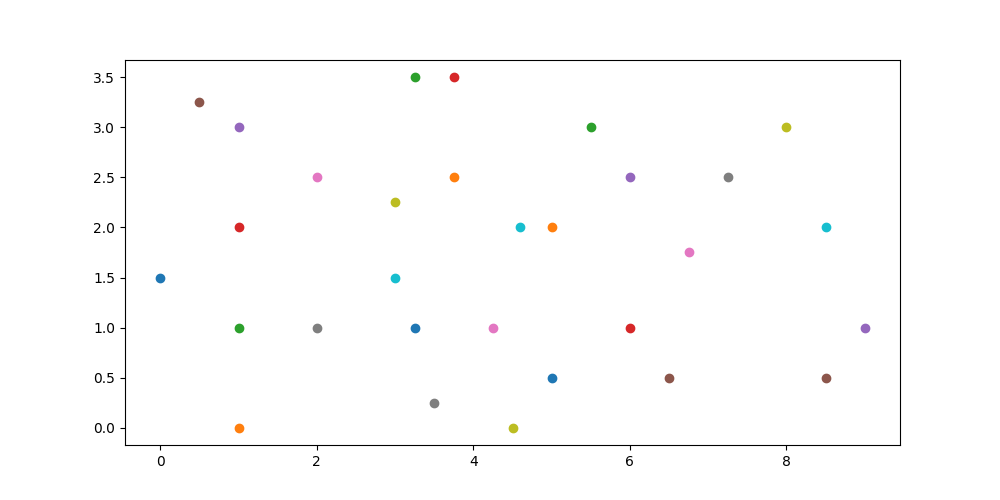

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

hubs = np.array(
    [
        (0, 1.5),  # starting point
        (1, 0),  # noBA
        (1, 1),  # eliteCollege
        (1, 2),  # privateCollege
        (1, 3),  # publicCollege
        (0.5, 3.25),  # communityCollege
        (2, 2.5),  # lawSchool
        (2, 1),  # medDegree
        (3, 2.25),  # mba
        (3, 1.5),  # otherMasters
        (3.25, 1),  # doctorate
        (3.75, 2.5),  # military
        (3.25, 3.5),  # lawyerPrivatePractice
        (3.75, 3.5),  # publicLawyerOrJudge
        (9, 1),  # prevUnsuccessfulCandidate
        (8.5, 0.5),  # partyPolitics
        (4.25, 1),  # religion
        (3.5, 0.25),  # healthcare
        (4.5, 0),  # blueCollarOrServiceJob
        (4.6, 2),  # education
        (5, 0.5),  # nonprofitsAndUnions
        (5, 2),  # sports
        (5.5, 3),  # media
        (6, 1),  # realEstate
        (6, 2.5),  # lawEnforcement
        (6.5, 0.5),  # farmingOrRanching
        (6.75, 1.75),  # businessOrManagement
        (7.25, 2.5),  # lobbyingOrPacs
        (8, 3),  # localGov
        (8.5, 2),  # stateLeg
        (9, 2.75),  # nonElectedGovJob
        # congressLabels
    ]
)
for pt, lab in zip(hubs, cats_to_points.keys()):
    ax.scatter(x=pt[0], y=pt[1], label=lab)
    mplcursors.cursor(
        ax,  # hover=True
    )
plt.show()